1355.421130952381


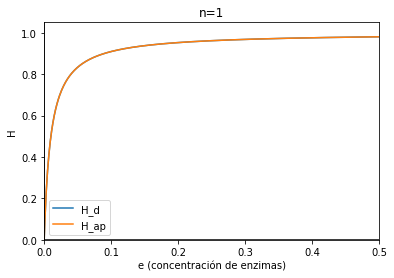

In [1]:
'funciones de Hill'

#programa para graficar las difernetes funciones de Hill

# se importan las librerias
import numpy as np
import math 
import random as rnd
from matplotlib import pyplot

def fac(n): #x!
    if n<0:
        return 0
    else:
        l1=0
        l2=1
        while l1 < n:
          l1=l1+1
          l2=l1*l2
        return l2

def prod(x, n): # x!/(x-n)!
    l2=x-n
    if n==0:
        return 1
    if l2==0 or l2==1:
        return fac(x)
    else:
        xprod= l2+1
        if n!=0 and l2>0:
            for i in range(1,n):
                xprod= xprod * (l2+1+i)
            return xprod
        elif l2<0:
             return 0
        else:
            return 1

def exponencial(y,n):
    if n==0:
        return 1
    else:
        return y**n

def series(x,K,n):
    l1=0
    l2=0
    while l1<n+1:
       l3= exponencial(K,n-l1)* exponencial(x,l1)
       l2=l2+l3
       l1=l1+1
    return l2

def seriei(x,K,n):
    l1=0
    l2=0
    while l1<n+1:
       l3= exponencial(K,n-l1)* exponencial(x,l1) * prod(n,l1)/fac(l1)
       l2=l2+l3
       l1=l1+1
    return l2

def H_d(x,n,K,j): #funcion de hill determinista
    return (x)**n/(K + (x)**n)

def H_sd(x,n,K,j):# funcion de Hill semideterminista
    if x<n:
        return 0
    if x>=n and x<j/2:
        return prod(x,n)/(K*(j**n) + prod(x,n))
    if x>=n and x>=25:
        return prod(x+n,n)/(K*(j**n) + prod(x+n,n))

def H_ss(x,n,K,j):# funcion de Hill semiestocastica
    if x<n:
        return 0
    if x>=n and x<j/2:
        return prod(x,n)/(K*(j**n)*np.exp((n-1)/j) + prod(x,n))
    if x>=n and x>=j/2:
        return prod(x+n,n)/(K*(j**n)*np.exp((n-1)/j) + prod(x+n,n))

def H_ap(x,n,K,j): # funcion de hill con aproximaciones
    return ((x)**n + (n/(j))*(n-1)*(x)**(n-1) )/(K + (x)**n + (n/(j))*(n-1)*(x)**(n-1))

def H_ds(x,n,K,j): #funcion de hill determinista secuencial
    return (x/j)**n/(series((x/j),K,n))

def H_ds1(x,n,K,j): #funcion de hill determinista secuencial exacto
    return (x/j-K)*(x/j)**n/((x/j)**(n+1)-(K)**(n+1))

def H_di(x,n,K,j): #funcion de hill determinista independiente
    return (x/j)**n/(K+x/j)**n

#elementos para funcion de Hill con correcciones estocasticas secuencial

def a(x,i,n,j,K): #terminos de la serie
    return (x**i)*((x+ n*(n-1)/j)/(x+ (n-i)*(n-1-i)/j))*(K**(n-i))

def seriese(x,n,j,K):
    l1= 0
    for i in range(1,n+1):
        l1= l1 + a(x,i,n,j,K)
    return l1

def H_es(x,n,K,j): ##funcion de hill con correcciones secuencial
    return ((x**n) + (n/(j))*(n-1)*((x)**(n-1)) )/(K**n + seriese(x,n,j,K))

#elementos para funcion de Hill con correcciones estocasticas independiente

def a1(x,i,n,j,K): #terminos de la serie
    
    return (x**i)*((x+ n*(n-1)/j)/(x+ (n-i)*(n-1-i)/j))*(K**(n-i))*prod(n,i)/fac(i)

def serieie(x,n,j,K):
    l1= 0
    for i in range(1,n+1):
        l1= l1 + a1(x,i,n,j,K)
    return l1

print(serieie(5,4,50,1))

def H_ei(x,n,K,j): ##funcion de hill con correcciones secuencial
    return ((x**n) + (n/(j))*(n-1)*((x)**(n-1)) )/(K**n + serieie(x,n,j,K))

# Valores del eje X que toma el gráfico.
x = np.arange(0.00001, 1, 0.001)
#x=range(0,2000)

#y= [math.log(i) for i in x ]
# Graficar ambas funciones.
#pyplot.plot(x, [H_di(i,1,1,1) for i in x], label='n=1')
#pyplot.plot(y, [H_ds(i,40,1,1) for i in x], label='n=3.2')
pyplot.plot(x, [H_di(i,1,.01,1) for i in x], label='H_d')
pyplot.plot(x, [H_ei(i,1,.01,50) for i in x], label='H_ap')

# Establecer el color de los ejes.
pyplot.axhline(0, color="black")
pyplot.axvline(0, color="black")

# Limitar los valores de los ejes.
pyplot.xlim(0, .5)
pyplot.ylim(0, 1.05)
pyplot.title("n=1")
pyplot.xlabel("e (concentración de enzimas)")
pyplot.ylabel("H")
pyplot.legend()

# Guardar gráfico como imágen PNG.
pyplot.savefig("hi2.png")

# Mostrarlo.
pyplot.show()